In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from matplotlib import pyplot as plt

repo_dir = os.getcwd() + '/repo'
tft_dir = os.path.join(repo_dir, 'tft')
os.chdir(tft_dir)

import warnings  
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
!ls

 carriage_services.csv		     'outputs_mobiact(v2)(undersampling)'
 data_formatters		     'outputs_mobiact(v2)_wo_pinfo'
 data_formatters.zip		      outputs_mobiact_wo_age
 dlr_preprocessed		      outputs_mobiact_wo_gender
 dlr_tft_results		      outputs_mobiact_wo_known
 expt_settings			      outputs_mobiact_wo_known_no_bioinfo
 expt_settings.zip		      outputs_mobiact_wo_known_no_bioinfo2
 libs				      outputs_notchFall
 libs.zip			     'outputs_notchFall(oversampling)'
 mobiact_dataset		      outputs_notchFall_swa
 MobiAct_Dataset_v2.0.rar	     'outputs_notchFall(undersampling)'
 MobiAct_Dataset_v2-Copy1.0.rar       outputs_pm2.5
 mobiact_preprocessed		      outputs_smartFall
 MobiAct_preprocessed.zip	     'outputs_smartFall(oversampling)'
 mobi_tft_wo_known_no_bioinfo	      outputs_smartFall_swa
 mobi_tft_wo_known_results	     'outputs_smartFall(undersampling)'
 notch_dataset			      outputs_stock
 output_folder			      outputs_stock_v2
 outputs			      outputs_stock_v3
 outputs_ca

In [4]:
output_folder = os.path.join(os.getcwd(), 'outputs_dlr_wo_bioinfo')   # Root folder to save experiment outputs
force_download = False 
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

## Data Sample

In [20]:
train = pd.read_csv('dlr_preprocessed/train.csv', index_col=0)
valid = pd.read_csv('dlr_preprocessed/valid.csv', index_col=0)
test = pd.read_csv('dlr_preprocessed/test.csv', index_col=0)

In [21]:
activity_info = ['FALLING', 'JUMPING', 'RUNNING', 'SITTING', 'STNDING', 'TRANSDW', 'TRANSUP', 'TRNSACC', 'TRNSDCC', 'WALKING', 'XLYINGX']

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(activity_info)

train_encoded = encoder.transform(train['labels'])
train['label_encoded'] = train_encoded

valid_encoded = encoder.transform(valid['labels'])
valid['label_encoded'] = valid_encoded

test_encoded = encoder.transform(test['labels'])
test['label_encoded'] = test_encoded

In [23]:
print(encoder.classes_, len(encoder.classes_))

['FALLING' 'JUMPING' 'RUNNING' 'SITTING' 'STNDING' 'TRANSDW' 'TRANSUP'
 'TRNSACC' 'TRNSDCC' 'WALKING' 'XLYINGX'] 11


In [24]:
train['known'] = 0
valid['known'] = 0
test['known'] = 0

train['circum'] = 0
valid['circum'] = 0
test['circum'] = 0

In [25]:
test[test['labels'] == 'FALLING']['per_name'].unique()

array(['Sinja'], dtype=object)

In [26]:
valid[valid['per_idx'] == 3]

,time,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,labels,per_name,per_idx,per_age,per_height,per_gender,label_encoded,known,circum
0,17.15,-9.702358,0.020635,1.674165,0.013820,-0.013123,0.016836,1.273326,0.392144,0.312653,STNDING,Cristina,3,27.0,1.6,Female,4,0,0
1,17.16,-9.707232,0.025566,1.666926,0.004869,-0.003397,0.015052,1.267351,0.391066,0.307638,STNDING,Cristina,3,27.0,1.6,Female,4,0,0
2,17.17,-9.702337,0.011063,1.664216,-0.014894,-0.007078,0.016662,1.270401,0.394067,0.311236,STNDING,Cristina,3,27.0,1.6,Female,4,0,0
3,17.18,-9.692591,0.020641,1.671842,-0.007739,-0.015927,0.018439,1.270320,0.389785,0.311519,STNDING,Cristina,3,27.0,1.6,Female,4,0,0
4,17.19,-9.680356,-0.003477,1.661697,-0.005921,0.001813,0.018580,1.271230,0.391007,0.312000,STNDING,Cristina,3,27.0,1.6,Female,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18647,203.62,-9.446487,2.271615,1.531511,-0.006426,0.002052,0.010239,1.342089,0.087020,0.349809,STNDING,Cristina,3,27.0,1.6,Female,4,0,0
18648,203.63,-9.436739,2.278773,1.539082,-0.006437,-0.006810,0.010170,1.343735,0.086483,0.351201,STNDING,Cristina,3,27.0,1.6,Female,4,0,0
18649,203.64,-9.441596,2.269238,1.526646,0.000775,0.007439,0.008541,1.344754,0.087257,0.353424,STNDING,Cristina,3,27.0,1.6,Female,4,0,0
18650,203.65,-9.426953,2.274046,1.526921,0.006095,-0.005032,0.014754,1.343423,0.086178,0.350021,STNDING,Cristina,3,27.0,1.6,Female,4,0,0


In [27]:
train['per_idx'].unique(), valid['per_idx'].unique(), test['per_idx'].unique()

(array([ 8,  1, 13, 14, 10,  4,  0,  9, 18]),
 array([ 5,  3,  6, 16]),
 array([ 2,  7, 15, 11, 17]))

# Data Formatter

In [28]:
from data_formatters.base import GenericDataFormatter, DataTypes, InputTypes

# View avialable inputs and data types.
print("Available data types:")
for option in DataTypes:
    print(option)

print()
print("Avaialbe input types:")
for option in InputTypes:
    print(option)

Available data types:
DataTypes.REAL_VALUED
DataTypes.CATEGORICAL
DataTypes.DATE

Avaialbe input types:
InputTypes.TARGET
InputTypes.OBSERVED_INPUT
InputTypes.KNOWN_INPUT
InputTypes.STATIC_INPUT
InputTypes.ID
InputTypes.TIME


In [29]:
from libs import utils 
import sklearn.preprocessing
class DLRFormatter(GenericDataFormatter):
    _column_definition = [
        ('per_idx', DataTypes.CATEGORICAL, InputTypes.ID),
        ('time', DataTypes.REAL_VALUED, InputTypes.TIME),
#         ('per_age', DataTypes.REAL_VALUED, InputTypes.STATIC_INPUT),
#         ('per_height', DataTypes.REAL_VALUED, InputTypes.STATIC_INPUT),
        ('circum', DataTypes.CATEGORICAL, InputTypes.STATIC_INPUT),
        ('known', DataTypes.CATEGORICAL, InputTypes.KNOWN_INPUT),
        ('acc_x', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('acc_y', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('acc_z', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('gyro_x', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('gyro_y', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('gyro_z', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('label_encoded', DataTypes.REAL_VALUED, InputTypes.TARGET)
    ]
    
    def __init__(self):
        """initializes formatter"""
        
        self.identifiers = None
        self._real_scalers = None
        self._cat_scalers = None
        self._target_scaler = None
        self._num_classes_per_cat_input = None
        self._time_steps = self.get_fixed_params()['total_time_steps']
    
    def split_data(self, train, valid, test):
        """
        split data frame into training-validation-test data frames
        
        """
        print('Formatting train-valid-test splits.')
        
        train_data = train

        val_data = valid
        
        test_data = test
        
        self.set_scalers(train_data)
        
        return (self.transform_inputs(data) for data in [train_data, val_data, test_data])
    
    def set_scalers(self, df):
        """
        Calibrates scalers using the data supplied.
        (제공된 데이터를 사용해서 scaler 교정)

        Args:
          df: Data to use to calibrate scalers.
        """
        print('Setting scalers with training data...')
        
        column_definitions = self.get_column_definition()

        id_column = utils.get_single_col_by_input_type(InputTypes.ID,
                                                       column_definitions)
        target_column = utils.get_single_col_by_input_type(InputTypes.TARGET,
                                                           column_definitions)
        # extract identifiers in case required
        self.identifiers = list(df[id_column].unique())
        
        # Format real scalers
        real_inputs = utils.extract_cols_from_data_type(
            DataTypes.REAL_VALUED, column_definitions,
            {InputTypes.ID, InputTypes.TIME})
        
        data = df[real_inputs].values
        self._real_scalers = sklearn.preprocessing.StandardScaler().fit(data)
        
        # target데이터를 prediction에 사용
        self._target_scaler = sklearn.preprocessing.StandardScaler().fit(df[[target_column]].values)
        categorical_inputs = utils.extract_cols_from_data_type(
            DataTypes.CATEGORICAL, column_definitions,
            {InputTypes.ID, InputTypes.TIME})
        categorical_scalers = {}
        num_classes = []
        for col in categorical_inputs:
            srs = df[col].apply(str)
            categorical_scalers[col] = sklearn.preprocessing.LabelEncoder().fit(srs.values)
            num_classes.append(srs.nunique())
        
        # set categorical scaler outputs
        self._cat_scalers = categorical_scalers
        self._num_classes_per_cat_input = num_classes
        
    def transform_inputs(self, df):
        """
        performs feature transformations.
        
        feature engineering, preprocessing and normalization을 포함
        
        Args:
            df - data frame to transform.
            
        Returns:
            Transformed data frame.
        """
        output = df.copy()
        
        if self._real_scalers is None and self._cat_scalers is None:
            raise ValueError('Scalers have not been set!')
        
        column_definitions = self.get_column_definition()
        id_col = utils.get_single_col_by_input_type(InputTypes.ID,
                                                column_definitions)

        real_inputs = utils.extract_cols_from_data_type(
            DataTypes.REAL_VALUED, column_definitions,
            {InputTypes.ID, InputTypes.TIME}
        )
        categorical_inputs = utils.extract_cols_from_data_type(
            DataTypes.CATEGORICAL, column_definitions,
            {InputTypes.ID, InputTypes.TIME})
        # Transform real inputs per entity
        df_list = []
        for identifier, sliced in df.groupby(id_col):
          # Filter out any trajectories that are too short
#           print(identifier)
          if len(sliced) >= self._time_steps:
            sliced_copy = sliced.copy()
            sliced_copy[real_inputs] = self._real_scalers.transform(
                sliced_copy[real_inputs].values)
            df_list.append(sliced_copy)

        output = pd.concat(df_list, axis=0)
        for col in categorical_inputs:
            string_df = df[col].apply(str)
            output[col] = self._cat_scalers[col].transform(string_df)
        return output
    
    def format_predictions(self, predictions):
        output = predictions.copy()
        
        column_names = predictions.columns
        for col in column_names:
            if col not in {'forecast_time', 'identifier'}:
                output[col] = self._target_scaler.inverse_transform(predictions[col])
                
        return output
    
    def get_fixed_params(self):
        fixed_params = {
            'total_time_steps': 100,     # Total width of the Temporal Fusion Decoder
            'num_encoder_steps': 50,    # Length of LSTM decoder (ie. # historical inputs)
            'num_epochs': 100,            # Max number of epochs for training
            'early_stopping_patience': 5, # Early stopping threshold for # iterations with no loss improvement
            'multiprocessing_workers': 5  # Number of multi-processing workers
        }
        
        return fixed_params
    
    def get_default_model_params(self):
        model_params = {
            'dropout_rate': 0.3,
            'hidden_layer_size': 160,
            'learning_rate': 0.01,
            'minibatch_size': 64,
            'max_gradient_norm': 0.01,
            'num_heads': 4,
            'stack_size': 1
        }

        return model_params

In [30]:
data_formatter = DLRFormatter()
train, valid, test = data_formatter.split_data(train, valid, test)
train_samples, valid_samples = data_formatter.get_num_samples_for_calibration(
  )

Formatting train-valid-test splits.
Setting scalers with training data...
0
1
4
8
9
10
13
14
18
3
5
6
16
2
7
11
15
17


# Model

In [31]:
import libs.hyperparam_opt
import libs.tft_model
import libs.utils as util

ModelClass = libs.tft_model.TemporalFusionTransformer
data_params = data_formatter.get_experiment_params()
param_ranges = ModelClass.get_hyperparm_choices()

In [32]:
model_params = {'dropout_rate': 0.3,      # Dropout discard rate
                'hidden_layer_size': 320, # Internal state size of TFT
                'learning_rate': 0.001,   # ADAM initial learning rate
                'minibatch_size': 256,    # Minibatch size for training
                'max_gradient_norm': 1.,# Max norm for gradient clipping
                'num_heads': 4,           # Number of heads for multi-head attention
                'stack_size': 1           # Number of stacks (default 1 for interpretability)
               }

In [33]:
model_folder = os.path.join(output_folder, 'saved_models', 'DLR', 'fixed')
model_params['model_folder'] = model_folder

model_params.update(data_params)

In [34]:
HyperparamOptManager = libs.hyperparam_opt.HyperparamOptManager
print("*** Loading hyperparm manager ***")
opt_manager = HyperparamOptManager(param_ranges, data_params, model_folder)

*** Loading hyperparm manager ***


In [35]:
success = opt_manager.load_results()
restart_opt = None
print(success)
if success and not restart_opt:
    print("Loaded results from previous training")
else:
    print("Creating new hyperparameter optimisation")
    opt_manager.clear()

Loading results from /workspace/inkyung/TFT/repo/tft/outputs_dlr_wo_bioinfo/saved_models/DLR/fixed
False
Creating new hyperparameter optimisation


In [36]:
import tensorflow as tf
from libs.tft_model import TemporalFusionTransformer

# Specify GPU usage
tf_config = utils.get_default_tensorflow_config(tf_device="gpu", gpu_id='3')

Selecting GPU ID=3


In [37]:
tf.compat.v1.get_default_graph()
with tf.Graph().as_default(), tf.compat.v1.Session(config=tf_config) as sess:
    tf.compat.v1.keras.backend.set_session(sess)
    params = opt_manager.get_next_parameters()
    # Create a TFT model
    model = TemporalFusionTransformer(model_params,
                                    use_cudnn=True) # Run model on GPU using CuDNNLSTM cells
    
    # Sample data into minibatches for training
    if not model.training_data_cached():
        model.cache_batched_data(train, "train", num_samples=train_samples)
        model.cache_batched_data(valid, "valid", num_samples=valid_samples)

    # Train and save model
    model.fit()
    
    val_loss = model.evaluate()
    if np.allclose(val_loss, 0.) or np.isnan(val_loss):
        # Set all invalid losses to infintiy.
        # N.b. val_loss only becomes 0. when the weights are nan.
        print("Skipping bad configuration....")
        val_loss = np.inf
    opt_manager.update_score(params, val_loss, model)
    tf.compat.v1.keras.backend.set_session(sess)
    model.save(model_folder)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla V100-DGXS-32GB, pci bus id: 0000:0f:00.0, compute capability: 7.0

Resetting temp folder...
*** TemporalFusionTransformer params ***
# dropout_rate = 0.3
# hidden_layer_size = 320
# learning_rate = 0.001
# minibatch_size = 256
# max_gradient_norm = 1.0
# num_heads = 4
# stack_size = 1
# model_folder = /workspace/inkyung/TFT/repo/tft/outputs_dlr_wo_bioinfo/saved_models/DLR/fixed
# total_time_steps = 100
# num_encoder_steps = 50
# num_epochs = 100
# early_stopping_patience = 5
# multiprocessing_workers = 5
# column_definition = [('per_idx', <DataTypes.CATEGORICAL: 1>, <InputTypes.ID: 4>), ('time', <DataTypes.REAL_VALUED: 0>, <InputTypes.TIME: 5>), ('acc_x', <DataTypes.REAL_VALUED: 0>, <InputTypes.OBSERVED_INPUT: 1>), ('acc_y', <DataTypes.REAL_VALUED: 0>, 

Cached data "train" updated
Cached data "valid" updated
*** Fitting TemporalFusionTransformer ***
Getting batched_data
Using cached training data
Using cached validation data
Using keras standard fit
Train on 1507568 samples, validate on 641421 samples
Epoch 1/100
1507568/1507568 [==============================] - ETA: 0s - loss: 0.0701WARNING:tensorflow:From /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
1507568/1507568 [==============================] - 2812s 2ms/sample - loss: 0.0701 - val_loss: 0.0401
Epoch 2/100
1507568/1507568 [==============================] - 2808s 2ms/sample - loss: 0.0294 - val_loss: 0.0309
Epoch 3/100
1507568/1507568 [==============================] - 2804s 2ms/sample - loss: 0.02

# Evaluation

In [38]:
tf.compat.v1.reset_default_graph()
with tf.Graph().as_default(), tf.compat.v1.Session(config=tf_config) as sess:
    tf.compat.v1.keras.backend.set_session(sess)
    # Create a new model & load weights
    model = TemporalFusionTransformer(model_params,
                                      use_cudnn=True)
    model.load(model_folder)
    
    # Make forecasts
    output_map = model.predict(test, return_targets=True)
    
    targets = data_formatter.format_predictions(output_map["targets"])
    # Format predictions
    
    p50_forecast = data_formatter.format_predictions(output_map["p50"])
    p90_forecast = data_formatter.format_predictions(output_map["p90"])

    def extract_numerical_data(data):
        """Strips out forecast time and identifier columns."""
        return data[[
            col for col in data.columns
            if col not in {"forecast_time", "identifier"}
        ]]
    # Compute Losses
    p50_loss = utils.numpy_normalised_quantile_loss(
        extract_numerical_data(targets), extract_numerical_data(p50_forecast),
        0.5)
    p90_loss = utils.numpy_normalised_quantile_loss(
        extract_numerical_data(targets), extract_numerical_data(p90_forecast),
        0.9)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla V100-DGXS-32GB, pci bus id: 0000:0f:00.0, compute capability: 7.0

Resetting temp folder...
*** TemporalFusionTransformer params ***
# dropout_rate = 0.3
# hidden_layer_size = 320
# learning_rate = 0.001
# minibatch_size = 256
# max_gradient_norm = 1.0
# num_heads = 4
# stack_size = 1
# model_folder = /workspace/inkyung/TFT/repo/tft/outputs_dlr_wo_bioinfo/saved_models/DLR/fixed
# total_time_steps = 100
# num_encoder_steps = 50
# num_epochs = 100
# early_stopping_patience = 5
# multiprocessing_workers = 5
# column_definition = [('per_idx', <DataTypes.CATEGORICAL: 1>, <InputTypes.ID: 4>), ('time', <DataTypes.REAL_VALUED: 0>, <InputTypes.TIME: 5>), ('acc_x', <DataTypes.REAL_VALUED: 0>, <InputTypes.OBSERVED_INPUT: 1>), ('acc_y', <DataTypes.REAL_VALUED: 0>, 

Loading model from /workspace/inkyung/TFT/repo/tft/outputs_dlr_wo_bioinfo/saved_models/DLR/fixed/TemporalFusionTransformer.ckpt
tensor: TemporalFusionTransformer/dense_10/bias (float32) [1]
[0.]
tensor: TemporalFusionTransformer/dense_10/kernel (float32) [320, 1]
[[-1.11214966e-02]
 [ 2.42136419e-02]
 [-8.20463300e-02]
 [-5.30517101e-02]
 [-7.15772137e-02]
 [ 1.31029114e-01]
 [ 9.92161632e-02]
 [ 4.72690612e-02]
 [-6.17693588e-02]
 [-1.31492093e-01]
 [ 3.28648686e-02]
 [ 7.33984113e-02]
 [ 9.52659994e-02]
 [-8.75352919e-02]
 [-5.95375150e-02]
 [ 1.10166937e-01]
 [-1.15475275e-01]
 [ 1.14877656e-01]
 [ 1.32008746e-01]
 [-1.26024514e-01]
 [ 3.40161175e-02]
 [ 2.74300128e-02]
 [ 7.82780200e-02]
 [ 6.53951019e-02]
 [-6.85986876e-03]
 [-3.28555405e-02]
 [ 3.68792862e-02]
 [-1.09507486e-01]
 [-9.80495289e-02]
 [-5.84131479e-03]
 [ 1.38078928e-02]
 [ 3.83658558e-02]
 [-1.15558505e-03]
 [ 7.02451766e-02]
 [-3.66161019e-02]
 [ 2.70868838e-02]
 [-2.74282917e-02]
 [ 9.33463573e-02]
 [ 8.46938342e

tensor: TemporalFusionTransformer/layer_normalization_20/gamma (float32) [320]
[ 1.1825222   1.4460754   1.2198459   1.0557631   0.46049118  0.87357545
  0.86375964  1.6762295   0.8472001   0.64823306  0.9510895   0.50932974
  2.121302    1.4142665   2.1913323   0.9123743   0.7395719   1.2576936
  1.477568    1.3470286   0.9956949   1.0872955   0.6441692   1.5778676
  2.3467891   1.4080304   2.3737009   0.46097028  0.06790975  0.7395267
  1.9333928   0.96950006  0.9004028   0.64521915  1.0462581   1.0868993
  1.4258469   2.061236    0.9958417   1.0288261   1.204522    1.3909707
  0.8864561   1.2209686   2.2121444   0.9037654   1.1286587   1.1576017
  1.4987173   0.5883993   1.2423975   0.51453114  1.082852    1.8927572
  1.3522344   0.70971435  1.2867635   0.8899353   1.6547937   1.5680674
  1.3547744   1.070659    0.41505045  1.0334044   0.9389889   0.87002975
  1.6302447   0.8608927   1.4607731   0.7968019   0.343333    1.6610267
  1.0764916   2.0068977   1.1544541   0.86116916  0.04

[[-2.68212259e-02]
 [-1.17064066e-01]
 [ 1.09590635e-01]
 [-5.27726933e-02]
 [-1.21755630e-01]
 [ 1.17314681e-01]
 [ 4.69072908e-02]
 [-5.89633733e-02]
 [ 8.44968259e-02]
 [ 4.42756712e-03]
 [-9.31593925e-02]
 [-1.04023963e-02]
 [-1.24508649e-01]
 [ 4.31617796e-02]
 [-9.30374488e-02]
 [ 9.52871293e-02]
 [ 1.03845343e-01]
 [ 6.99239820e-02]
 [ 2.77926773e-02]
 [-7.59705529e-02]
 [ 1.01639420e-01]
 [ 9.65932459e-02]
 [-3.23432684e-03]
 [-1.18885294e-01]
 [ 1.02637440e-01]
 [-1.14050016e-01]
 [-7.23972917e-02]
 [-1.28421068e-01]
 [ 4.31590080e-02]
 [ 2.48626620e-02]
 [-9.86546725e-02]
 [-3.30124274e-02]
 [ 3.03437412e-02]
 [-1.20395042e-01]
 [-8.84762406e-02]
 [-5.52841723e-02]
 [ 1.05860233e-01]
 [ 4.75755036e-02]
 [ 8.32051486e-02]
 [-8.73841494e-02]
 [-6.48055971e-03]
 [-5.52224368e-02]
 [-6.39420077e-02]
 [ 9.96634811e-02]
 [ 8.84857923e-02]
 [ 2.27590948e-02]
 [ 9.58593190e-02]
 [ 8.77445936e-03]
 [-7.33633339e-02]
 [ 2.35193521e-02]
 [ 4.13027108e-02]
 [-1.33125931e-02]
 [ 2.6852086

INFO:tensorflow:Restoring parameters from /workspace/inkyung/TFT/repo/tft/outputs_dlr_wo_bioinfo/saved_models/DLR/fixed/TemporalFusionTransformer.ckpt
Done.


In [39]:
import datetime as dte
print("Hyperparam optimisation completed @ {}".format(dte.datetime.now()))
print("Best validation loss = {}".format(val_loss))
# print("Params:")

# for k in best_params:
#     print(k, " = ", best_params[k])
#     print()
print("Normalised quantile losses: P50={}, P90={}".format(p50_loss.mean(), p90_loss.mean()))

Hyperparam optimisation completed @ 2021-06-24 15:29:27.951051
Best validation loss = 0.05555616754751841
Normalised quantile losses: P50=0.030390516472478986, P90=0.004915054705395655


In [40]:
import itertools
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(16, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, fontsize=20)
        plt.yticks(tick_marks, target_names, fontsize=20)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black",
                         fontsize='large')
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black",
                         fontsize='large')

    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    plt.show()

# Results

In [41]:
p50_forecast.head()

,forecast_time,identifier,t+0,t+1,t+2,t+3,t+4,t+5,t+6,t+7,...,t+40,t+41,t+42,t+43,t+44,t+45,t+46,t+47,t+48,t+49
0,17.64,2,3.777082,3.782442,3.784687,3.785063,3.784588,3.784053,3.783829,3.783703,...,3.780005,3.779865,3.779740,3.779597,3.779456,3.779321,3.779190,3.779052,3.778912,3.778774
1,17.65,2,3.777027,3.782337,3.784612,3.785025,3.784571,3.784040,3.783811,3.783685,...,3.779991,3.779850,3.779721,3.779574,3.779437,3.779304,3.779171,3.779033,3.778895,3.778754
2,17.66,2,3.777124,3.782322,3.784574,3.785004,3.784557,3.784033,3.783797,3.783664,...,3.779973,3.779834,3.779699,3.779563,3.779425,3.779288,3.779149,3.779015,3.778875,3.778737
3,17.67,2,3.777076,3.782296,3.784546,3.784993,3.784546,3.784024,3.783787,3.783664,...,3.779970,3.779829,3.779686,3.779557,3.779419,3.779279,3.779146,3.779005,3.778863,3.778739
4,17.68,2,3.777000,3.782291,3.784546,3.785000,3.784551,3.784024,3.783790,3.783663,...,3.779976,3.779834,3.779700,3.779560,3.779425,3.779283,3.779151,3.779010,3.778873,3.778738


In [42]:
p50_forecast['identifier'].unique()

array([ 2,  7, 11, 15, 17])

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report

def getScores(forecast, target):
    predicted, transformed_target = list(), list()

    for i in range(len(forecast)):
        value = forecast.iloc[i].values
        for v in value:
            if v >= 9.5:
                predicted.append(10.0)
            elif v < 9.5 and v >= 8.5:
                predicted.append(9.0)
            elif v < 8.5 and v >= 7.5:
                predicted.append(8.0)
            elif v < 7.5 and v >= 6.5:
                predicted.append(7.0)
            elif v < 6.5 and v >= 5.5:
                predicted.append(6.0)
            elif v < 5.5 and v >= 4.5:
                predicted.append(5.0)
            elif v < 4.5 and v >= 3.5:
                predicted.append(4.0)
            elif v < 3.5 and v >= 2.5:
                predicted.append(3.0)
            elif v < 2.5 and v >= 1.5:
                predicted.append(2.0)
            elif v < 1.5 and v >= 0.5:
                predicted.append(1.0)
            elif v < 0.5 and v >= -.5:
                predicted.append(0.0)
                
    for i in range(len(target)):
        value = target.iloc[i].values
        for v in value:
            if v >= 9.5:
                transformed_target.append(10.0)
            elif v < 9.5 and v >= 8.5:
                transformed_target.append(9.0)
            elif v < 8.5 and v >= 7.5:
                transformed_target.append(8.0)
            elif v < 7.5 and v >= 6.5:
                transformed_target.append(7.0)
            elif v < 6.5 and v >= 5.5:
                transformed_target.append(6.0)
            elif v < 5.5 and v >= 4.5:
                transformed_target.append(5.0)
            elif v < 4.5 and v >= 3.5:
                transformed_target.append(4.0)
            elif v < 3.5 and v >= 2.5:
                transformed_target.append(3.0)
            elif v < 2.5 and v >= 1.5:
                transformed_target.append(2.0)
            elif v < 1.5 and v >= 0.5:
                transformed_target.append(1.0)
            elif v < 0.5 and v >= -.5:
                transformed_target.append(0.0)
            else:
                print(v)
    
    recall = recall_score(transformed_target, predicted, average='macro')
    precision = precision_score(transformed_target, predicted, average='macro')
    f1 = f1_score(transformed_target, predicted, average='macro')
    acc = accuracy_score(transformed_target, predicted)
    cm = confusion_matrix(transformed_target, predicted)
    plot_confusion_matrix(cm)
    print(classification_report(transformed_target, predicted))
    return acc, precision, recall, f1

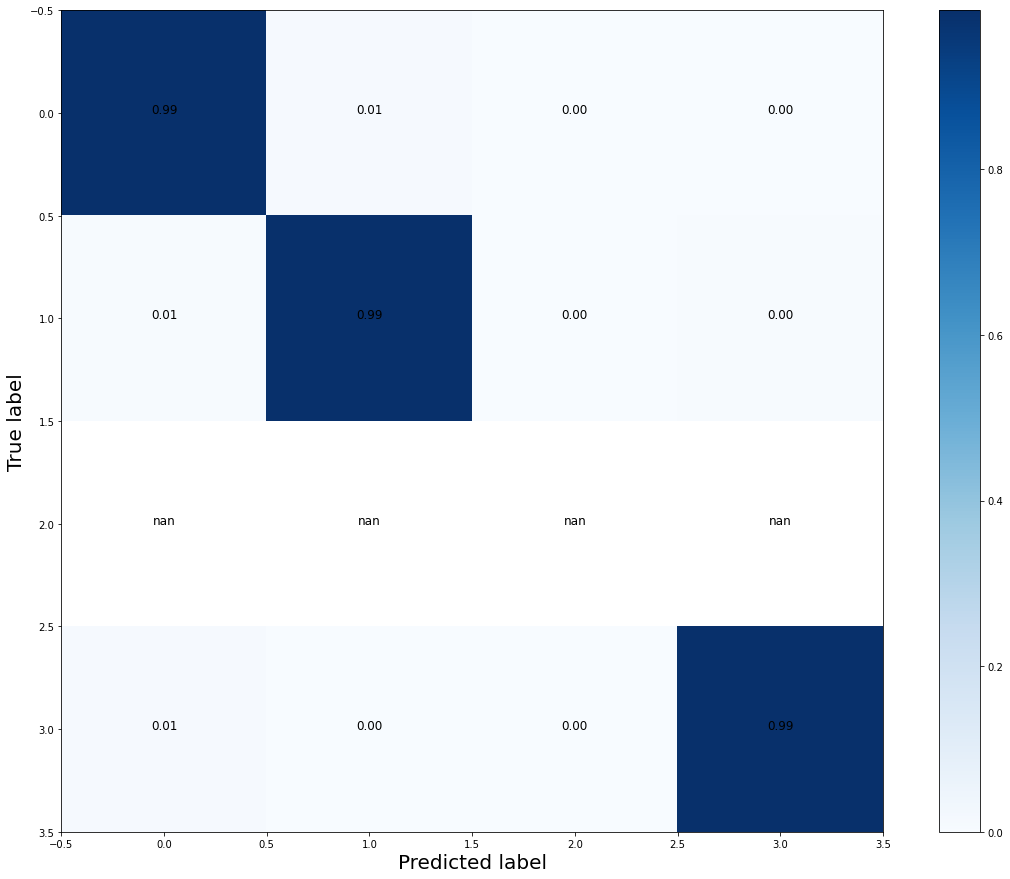

              precision    recall  f1-score   support

         3.0       0.98      0.99      0.99    943200
         4.0       1.00      0.99      0.99   1786050
         5.0       0.00      0.00      0.00         0
         9.0       0.99      0.99      0.99    955500

    accuracy                           0.99   3684750
   macro avg       0.74      0.74      0.74   3684750
weighted avg       0.99      0.99      0.99   3684750

Done  2


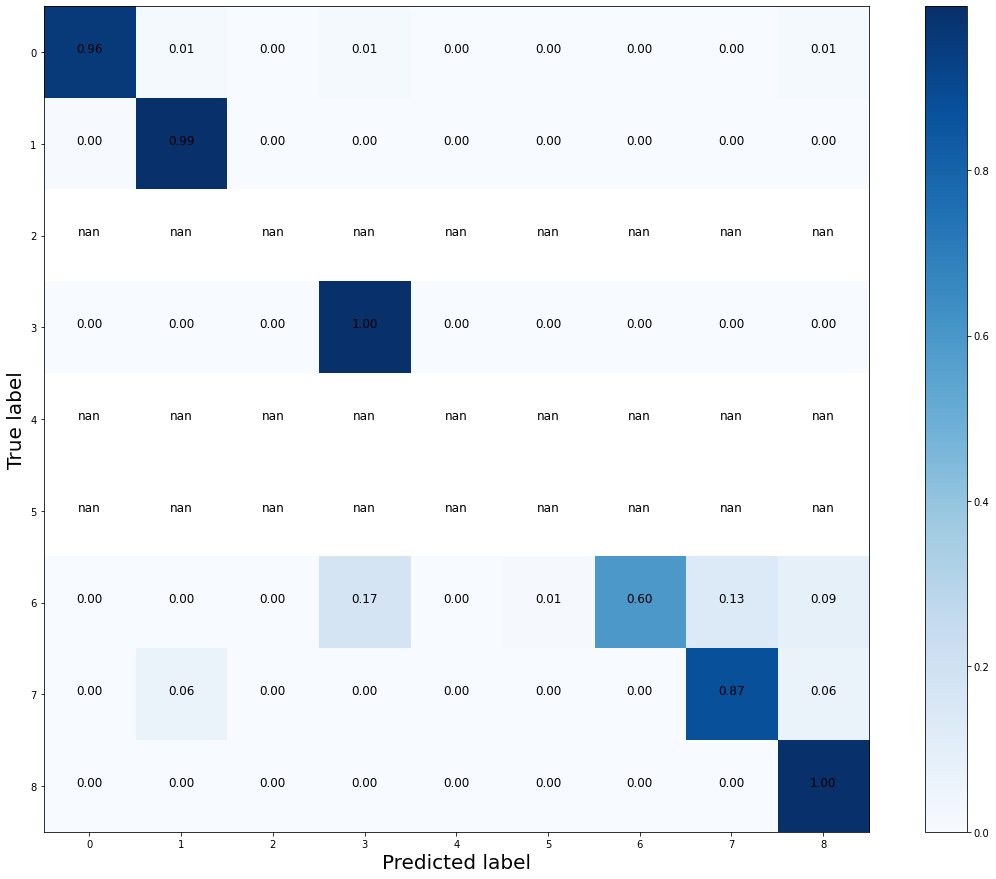

              precision    recall  f1-score   support

         1.0       0.98      0.96      0.97    289050
         2.0       0.99      0.99      0.99    977550
         3.0       0.00      0.00      0.00         0
         4.0       1.00      1.00      1.00   3410700
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.89      0.60      0.71     44550
         8.0       0.76      0.87      0.81     61200
         9.0       1.00      1.00      1.00   4558650

    accuracy                           0.99   9341700
   macro avg       0.62      0.60      0.61   9341700
weighted avg       0.99      0.99      0.99   9341700

Done  7


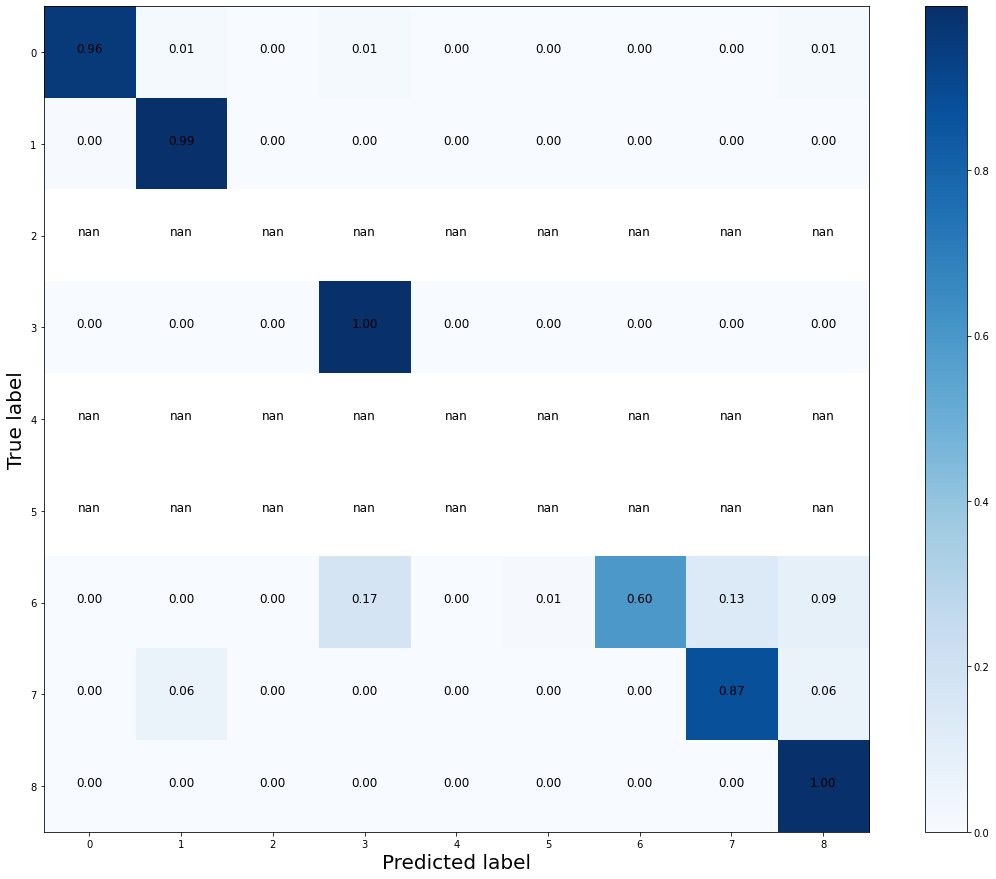

              precision    recall  f1-score   support

         1.0       0.98      0.96      0.97    289050
         2.0       0.99      0.99      0.99    977550
         3.0       0.00      0.00      0.00         0
         4.0       1.00      1.00      1.00   3410700
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.89      0.60      0.71     44550
         8.0       0.76      0.87      0.81     61200
         9.0       1.00      1.00      1.00   4558650

    accuracy                           0.99   9341700
   macro avg       0.62      0.60      0.61   9341700
weighted avg       0.99      0.99      0.99   9341700

Done  11


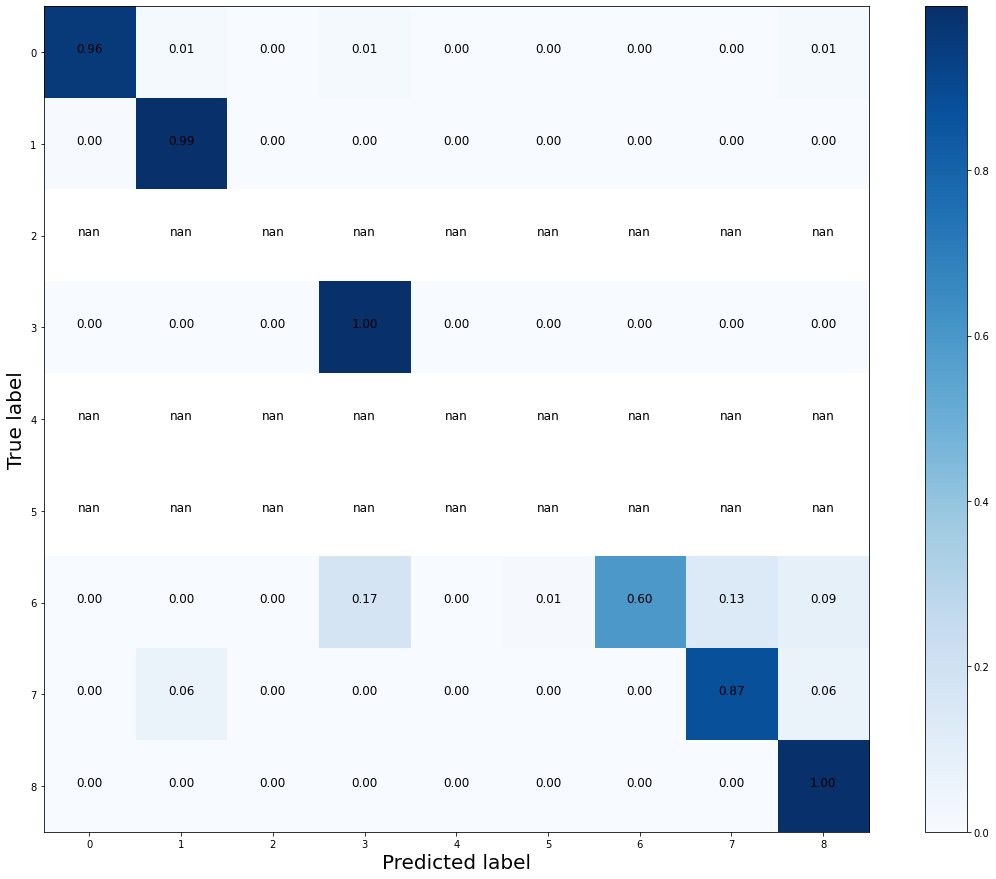

              precision    recall  f1-score   support

         1.0       0.98      0.96      0.97    289050
         2.0       0.99      0.99      0.99    977550
         3.0       0.00      0.00      0.00         0
         4.0       1.00      1.00      1.00   3410700
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.89      0.60      0.71     44550
         8.0       0.76      0.87      0.81     61200
         9.0       1.00      1.00      1.00   4558650

    accuracy                           0.99   9341700
   macro avg       0.62      0.60      0.61   9341700
weighted avg       0.99      0.99      0.99   9341700

Done  15


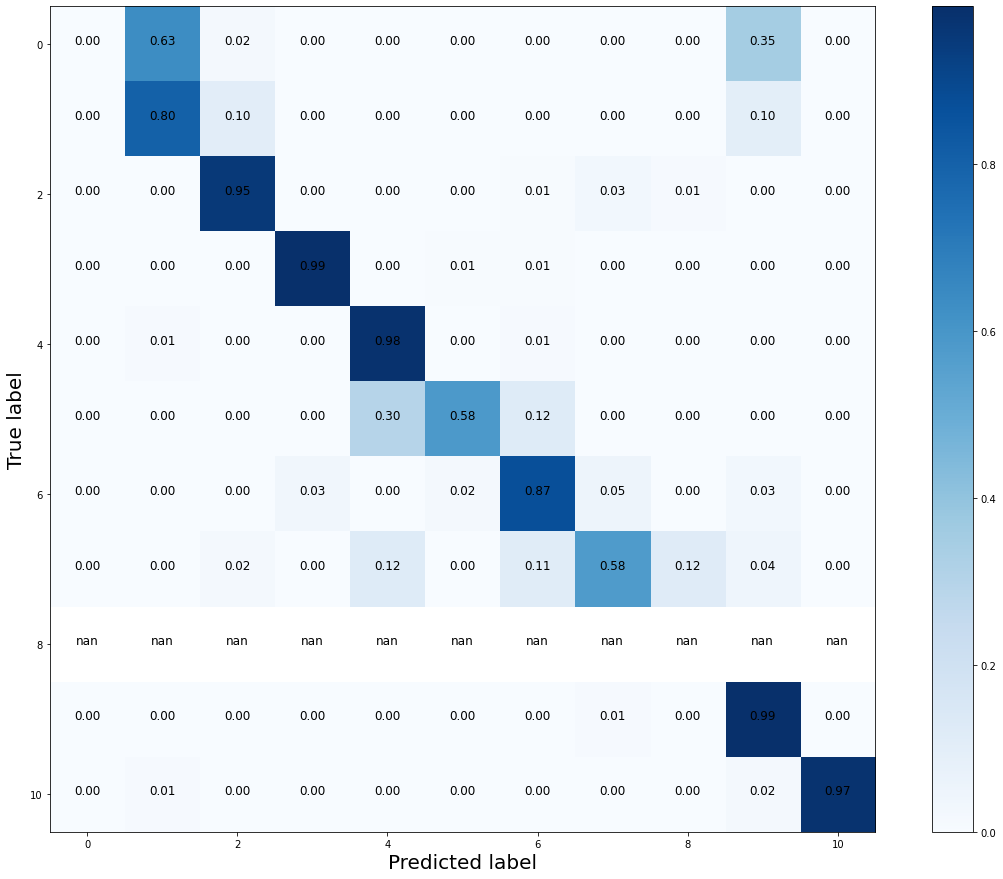

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3650
         1.0       0.63      0.80      0.71     13150
         2.0       0.93      0.95      0.94     27450
         3.0       0.98      0.99      0.99     89750
         4.0       0.97      0.98      0.98    263150
         5.0       0.79      0.58      0.67      9850
         6.0       0.81      0.87      0.84     40500
         7.0       0.77      0.58      0.66     31450
         8.0       0.00      0.00      0.00         0
         9.0       0.98      0.99      0.98    334200
        10.0       1.00      0.97      0.99    158050

    accuracy                           0.95    971200
   macro avg       0.71      0.70      0.70    971200
weighted avg       0.95      0.95      0.95    971200

Done  17


In [44]:
test_per_list = p50_forecast['identifier'].unique()
save_dir = 'dlr_tft_results/'
total_acc, total_precision, total_recall, total_f1 = 0., 0., 0., 0.

for num in test_per_list:
    forecast = p50_forecast[p50_forecast['identifier'] == num]
    target = targets[targets['identifier'] == num]

    forecast = forecast.drop(['forecast_time', 'identifier'], axis=1)
    target = target.drop(['forecast_time', 'identifier'], axis=1)
    
    acc, precision, recall, f1 = getScores(forecast, target)
    
    result = pd.DataFrame([acc, precision, recall, f1])
    result = result.T
    result.columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    result.to_csv(save_dir + str(num) + 'result.csv')
    
    total_acc += acc
    total_precision += precision
    total_recall += recall
    total_f1 += f1
    
    print('Done ', num)

In [45]:
print('Average Accuracy: ', total_acc / len(test_per_list))
print('Average Precision: ', total_precision / len(test_per_list))
print('Average Recall: ', total_recall / len(test_per_list))
print('Average F1 Score: ', total_f1 / len(test_per_list))

Average Accuracy:  0.9849910372687912
Average Precision:  0.6653237123432546
Average Recall:  0.6500036837361475
Average F1 Score:  0.6547403250171169


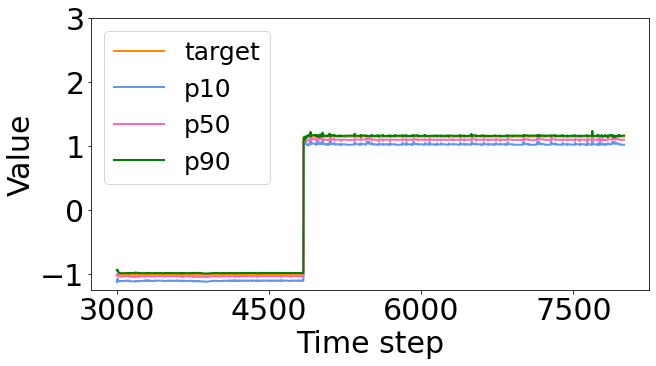

In [46]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5), facecolor='white')
plt.plot(output_map['targets']['t+0'][3000:8000], label='target', color='darkorange', linewidth=2)
plt.plot(output_map['p10']['t+0'][3000:8000], label='p10', color='cornflowerblue', linewidth=2)
plt.plot(output_map['p50']['t+0'][3000:8000], label='p50', color='hotpink', linewidth=2)
plt.plot(output_map['p90']['t+0'][3000:8000], label='p90', c='g', linewidth=2)
plt.legend(loc='upper left', fontsize=25)
plt.xlabel('Time step', fontsize=30)
plt.ylabel('Value', fontsize=30)
plt.xticks(np.arange(3000, 8000, 1500), fontsize=30)
plt.yticks(np.arange(-1, 4, 1), fontsize=30)
plt.show()